# METRO PASSENGER COUNTS AND GAS PRICES IN ISTANBUL IN 2022

Hello everyone.

In this work, the relation between passenger counts who uses metro lines in Istanbul in 2022 and gasoline prices in 2022 is being investigated.
For this purpose passenger count data is obtained from Istanbul Metropolitan Municipality Open Data Portal and gasolin price data is gathered from Opet.

In the first section data is being cleaned and pre-processed. 
And in the second section we visualize the data.
Finally in the 3th section we have an conclusion.

### CLEANING AND PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [ ]:
os.getcwd()

Data is gathered from Istanbul Metropolitan Municipality Open Data Portal : https://data.ibb.gov.tr/en/ 
Unfortunately it needed to be download manually, because it throws an max trials exceeded error when we try to download it by urrlib library. 
Here is the csv file link:
'https://data.ibb.gov.tr/en/dataset/ae3b2e4b-073a-48d0-8ef3-f28f19bcb19c/resource/5c2b78fc-3b68-4722-844f-3051c358a13f/download/2022-yl-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv'

In [4]:
df = pd.read_csv('./Data/2022-yl-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv', encoding = "ISO-8859-1",sep=',')

In [5]:
df.head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
0         9551           9027              2022                  1   
1         6791           6418              2022                  1   
2         3943           3775              2022                  1   
3         5133           4972              2022                  1   
4         6213           6011              2022                  1   

   transaction_day                               line station_name  \
0                1  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   
1                1  F1-TAKSIM-KABATAS FUNIKILER HATTI       TAKSIM   
2                2  F1-TAKSIM-KABATAS FUNIKILER HATTI       TAKSIM   
3                2  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   
4                3  F1-TAKSIM-KABATAS FUNIKILER HATTI      KABATAS   

  station_number     town  longitude   latitude  
0        KTS-TKS  Beyoðlu  28.992028  41.034056  
1        TAK-KBT  Beyoðlu  28.986444  41.036750  
2        TAK-KBT  Beyoðlu  28.986444  41.036750  
3        KTS-TKS  Beyoðlu  28.992028  41.034056  
4        KTS-TKS  Beyoðlu  28.992028  41.034056

In [6]:
df.describe()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
count  104364.000000  104364.000000          104364.0      104364.000000   
mean    14834.701525    8535.558258            2022.0           6.551934   
std     16339.850478    8637.080177               0.0           3.451156   
min         1.000000       1.000000            2022.0           1.000000   
25%      4530.000000    2897.750000            2022.0           4.000000   
50%      9494.000000    5890.500000            2022.0           7.000000   
75%     18990.000000   11480.000000            2022.0          10.000000   
max    167506.000000   75210.000000            2022.0          12.000000   

       transaction_day     longitude      latitude  
count    104364.000000  87258.000000  87258.000000  
mean         15.727368     29.000906     41.004952  
std           8.797457      0.136896      0.067766  
min           1.000000     28.768639     40.783806  
25%           8.000000     28.896083     40.981278  
50%          16.000000     28.976111     41.015972  
75%          23.000000     29.084361     41.040472  
max          31.000000     29.411556     41.139972

In [7]:
df.dtypes

passage_cnt            int64
passanger_cnt          int64
transaction_year       int64
transaction_month      int64
transaction_day        int64
line                  object
station_name          object
station_number        object
town                  object
longitude            float64
latitude             float64
dtype: object

In [8]:
set(df['line'])

{'F1-TAKSIM-KABATAS FUNIKILER HATTI',
 'IETT NOSTALJIK TRAMVAY',
 'IETT TUNEL',
 'M1-YENIKAPI-HAVALIMANI',
 'M2-YENIKAPI-HACIOSMAN',
 'M3-BASAKSEHIR-OLIMPIYATKOY',
 'M4-KADIKOY-TAVSANTEPE',
 'M5-USKUDAR CEKMEKOY METROSU',
 'M6-LEVENT - RUMELI HISARUSTU',
 'M7-KABATAS-MAHMUTBEY',
 'T1-KABATAS-BAGCILAR',
 'T3-KADIKOY-MODA',
 'T4-TOPKAPI-MESCID-I SELAM',
 'T5 EMINONU-ALIBEYKOY',
 'TCDD TASIMACILIK A.S.',
 'TF1-TELEFERIK MACKA - TASKISLA',
 'TF2-TELEFERIK EYUP PIYERLOTI'}

In [9]:
set(df['line'])

{'F1-TAKSIM-KABATAS FUNIKILER HATTI',
 'IETT NOSTALJIK TRAMVAY',
 'IETT TUNEL',
 'M1-YENIKAPI-HAVALIMANI',
 'M2-YENIKAPI-HACIOSMAN',
 'M3-BASAKSEHIR-OLIMPIYATKOY',
 'M4-KADIKOY-TAVSANTEPE',
 'M5-USKUDAR CEKMEKOY METROSU',
 'M6-LEVENT - RUMELI HISARUSTU',
 'M7-KABATAS-MAHMUTBEY',
 'T1-KABATAS-BAGCILAR',
 'T3-KADIKOY-MODA',
 'T4-TOPKAPI-MESCID-I SELAM',
 'T5 EMINONU-ALIBEYKOY',
 'TCDD TASIMACILIK A.S.',
 'TF1-TELEFERIK MACKA - TASKISLA',
 'TF2-TELEFERIK EYUP PIYERLOTI'}

In [10]:
df['line'][df['line'] == 'F1-TAKSIM-KABATAS FUNIKILER HATTI'] = 'F1-TAKSIM-KABATAS FUNICULAR LINE'
df['line'][df['line'] == 'IETT NOSTALJIK TRAMVAY'] = 'IETT NOSTALGIC TRAM'

In [11]:
df.head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
0         9551           9027              2022                  1   
1         6791           6418              2022                  1   
2         3943           3775              2022                  1   
3         5133           4972              2022                  1   
4         6213           6011              2022                  1   

   transaction_day                              line station_name  \
0                1  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
1                1  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
2                2  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
3                2  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
4                3  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   

  station_number     town  longitude   latitude  
0        KTS-TKS  Beyoðlu  28.992028  41.034056  
1        TAK-KBT  Beyoðlu  28.986444  41.036750  
2        TAK-KBT  Beyoðlu  28.986444  41.036750  
3        KTS-TKS  Beyoðlu  28.992028  41.034056  
4        KTS-TKS  Beyoðlu  28.992028  41.034056

In [12]:
set(df['station_name'][0:1500])

{'Beyoðlu', 'KABATAS', 'Karaköy', 'TAKSIM', nan}

In [13]:
df[pd.isna(df['town'])].head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
45615         2230           2003              2022                  1   
45616         2627           2439              2022                  1   
45617         3423           3277              2022                  1   
45618          808            779              2022                  1   
45620          837            773              2022                  1   

       transaction_day                  line        station_name  \
45615                1  M7-KABATAS-MAHMUTBEY         ÇIRÇIR DOÐU   
45616                1  M7-KABATAS-MAHMUTBEY  MAHMUTBEY M3 HOL 4   
45617                1  M7-KABATAS-MAHMUTBEY          YEÞÝLPINAR   
45618                1  M7-KABATAS-MAHMUTBEY       ÇAÐLAYAN DOÐU   
45620                1  M7-KABATAS-MAHMUTBEY  MAHMUTBEY M7 HOL 1   

      station_number town  longitude  latitude  
45615        CRC-CR2  NaN        NaN       NaN  
45616        MHY-MH4  NaN        NaN       NaN  
45617        YSP-YSP  NaN        NaN       NaN  
45618        CGL-CG2  NaN        NaN       NaN  
45620        MHY-MH1  NaN        NaN       NaN

Now let's make all letters capital in column town and station_name


In [14]:
df['town'] = df['town'].str.upper()
df['station_name'] = df['station_name'].str.upper()

We need to replace the turkish letters

In [15]:
turkish_letters= {'Ý': 'I', 'Ö': 'O', 'Ð': 'G', 'Þ': 'S', 'Ç': 'C','Ü':'U'}
df['station_name'] = df['station_name'].replace(turkish_letters, regex=True)
df['town'] = df['town'].replace(turkish_letters, regex=True)

There are some Turkish words like DOGU, BATI which means east and west, we can convert these into English.

In [16]:
turkis_directions = {'DOGU':'EAST', 'BATI':'WEST', 'KUZEY':'NORTH', 'GUNEY':'SOUTH'}
df['station_name'] = df['station_name'].replace(turkis_directions, regex=True)

In [17]:
df['town'][pd.isna(df['town'])].head()

45615    NaN
45616    NaN
45617    NaN
45618    NaN
45620    NaN
Name: town, dtype: object

There are nan values in town column and let's look at station names and try to find their towns by name with some searching over the internet.

In [18]:
set(df['station_name'][pd.isna(df['town'])])

{'ALIBEYKOY EAST',
 'ALIBEYKOY WEST',
 'CAGLAYAN EAST',
 'CAGLAYAN WEST',
 'CIRCIR EAST',
 'CIRCIR WEST',
 'GOZTEPE EAST',
 'GOZTEPE WEST',
 'KAGITHANE EAST',
 'KAGITHANE WEST',
 'KARADENIZ MAH. EAST',
 'KARADENIZ MAH. WEST',
 'KAZIMKARABEKIR',
 'MAHMUTBEY M3 HOL 3',
 'MAHMUTBEY M3 HOL 4',
 'MAHMUTBEY M7 HOL 1',
 'MAHMUTBEY M7 HOL 2',
 'MECIDIYEKOY EAST',
 'MECIDIYEKOY WEST',
 'NURTEPE EAST',
 'NURTEPE WEST',
 'ORUCREIS EAST',
 'ORUCREIS WEST',
 'TEKSTILKENT',
 'VEYSELKARANI EAST',
 'VEYSELKARANI WEST',
 'YENIMAHALLE',
 'YESILPINAR'}

In [19]:
towns = {'ALIBEYKOY EAST': 'EYUPSULTAN','ALIBEYKOY WEST':'EYUPSULTAN', 'CAGLAYAN EAST':'SISLI', 'CAGLAYAN WEST':'SISLI', 'CIRCIR EAST':'EYUPSULTAN', 'CIRCIR WEST':'EYUPSULTAN',
        'GOZTEPE EAST':'KADIKOY', 'GOZTEPE WEST':'KADIKOY', 'KAGITHANE EAST':'KAGITHANE', 'KAGITHANE WEST':'KAGITHANE','KARADENIZ MAH. EAST': 'GAZIOSMANPASA','KARADENIZ MAH. WEST': 'GAZIOSMANPASA',
        'KAZIMKARABEKIR':'GAZIOSMANPASA','MAHMUTBEY M3 HOL 3':'BAGCILAR', 'MAHMUTBEY M3 HOL 4':'BAGCILAR','MAHMUTBEY M7 HOL 1':'BAGCILAR','MAHMUTBEY M7 HOL 2':'BAGCILAR',
        'MECIDIYEKOY EAST':'SISLI', 'MECIDIYEKOY WEST':'SISLI', 'NURTEPE EAST':'KAGITHANE' ,'NURTEPE WEST':'KAGITHANE', 'ORUCREIS EAST':'ESENLER', 'ORUCREIS WEST':'ESENLER',
        'TEKSTILKENT':'ESENLER', 'VEYSELKARANI EAST':'EYUPSULTAN','VEYSELKARANI WEST':'EYUPSULTAN', 'YENIMAHALLE':'GAZIOSMANPASA', 'YESILPINAR':'EYUPSULTAN'}

In [20]:
df['town'][pd.isna(df['town'])] = df['station_name'].map(towns)

In [21]:
df.head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
0         9551           9027              2022                  1   
1         6791           6418              2022                  1   
2         3943           3775              2022                  1   
3         5133           4972              2022                  1   
4         6213           6011              2022                  1   

   transaction_day                              line station_name  \
0                1  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
1                1  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
2                2  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
3                2  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
4                3  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   

  station_number     town  longitude   latitude  
0        KTS-TKS  BEYOGLU  28.992028  41.034056  
1        TAK-KBT  BEYOGLU  28.986444  41.036750  
2        TAK-KBT  BEYOGLU  28.986444  41.036750  
3        KTS-TKS  BEYOGLU  28.992028  41.034056  
4        KTS-TKS  BEYOGLU  28.992028  41.034056

In [22]:
df[pd.isna(df['longitude'])==True].head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
730          984            873              2022                  1   
731          650            593              2022                  1   
732          700            638              2022                  1   
733          718            648              2022                  1   
734          746            679              2022                  1   

     transaction_day                 line station_name station_number  \
730                1  IETT NOSTALGIC TRAM          NaN            NaN   
731                2  IETT NOSTALGIC TRAM          NaN            NaN   
732                3  IETT NOSTALGIC TRAM          NaN            NaN   
733                4  IETT NOSTALGIC TRAM          NaN            NaN   
734                5  IETT NOSTALGIC TRAM          NaN            NaN   

        town  longitude  latitude  
730  BEYOGLU        NaN       NaN  
731  BEYOGLU        NaN       NaN  
732  BEYOGLU        NaN       NaN  
733  BEYOGLU        NaN       NaN  
734  BEYOGLU        NaN       NaN

In [23]:
set(df['line'][pd.isna(df['station_name'])==True])

{'IETT NOSTALGIC TRAM',
 'M4-KADIKOY-TAVSANTEPE',
 'M6-LEVENT - RUMELI HISARUSTU',
 'T3-KADIKOY-MODA',
 'T5 EMINONU-ALIBEYKOY',
 'TCDD TASIMACILIK A.S.'}

In [24]:
set(df['line'][pd.isna(df['station_name'])==True])

{'IETT NOSTALGIC TRAM',
 'M4-KADIKOY-TAVSANTEPE',
 'M6-LEVENT - RUMELI HISARUSTU',
 'T3-KADIKOY-MODA',
 'T5 EMINONU-ALIBEYKOY',
 'TCDD TASIMACILIK A.S.'}

Nostalgic tram is being used for only touristic purposes. It doesn't have an important role for transportation. And it has only three stations. We can drop this line

Same logic is valid for the line 'T3-KADIKOY-MODA'. It is mostly used for touristic purpose.

In [25]:
df = df[df['line'] != 'IETT NOSTALGIC TRAM']
df = df[df['line'] != 'T3-KADIKOY-MODA']

In [26]:
df[pd.isna(df['station_name'])==True]

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
33859           30              3              2022                  9   
44834           96             46              2022                  7   
79703            2              1              2022                  5   
80958            4              2              2022                  8   
94692            2              1              2022                  8   
95957           14              7              2022                  8   

       transaction_day                          line station_name  \
33859               29         M4-KADIKOY-TAVSANTEPE          NaN   
44834               29  M6-LEVENT - RUMELI HISARUSTU          NaN   
79703               13          T5 EMINONU-ALIBEYKOY          NaN   
80958               26          T5 EMINONU-ALIBEYKOY          NaN   
94692                2         TCDD TASIMACILIK A.S.          NaN   
95957               25         TCDD TASIMACILIK A.S.          NaN   

      station_number      town  longitude  latitude  
33859            NaN  BAKIRKOY        NaN       NaN  
44834            NaN  BAKIRKOY        NaN       NaN  
79703            NaN  BAKIRKOY        NaN       NaN  
80958            NaN  BAKIRKOY        NaN       NaN  
94692            NaN  BAKIRKOY        NaN       NaN  
95957            NaN  BAKIRKOY        NaN       NaN

Since we can't figure which station was used in these rows we can drop them too.

In [27]:
drop_index = df[pd.isna(df['station_name'])==True].index
df.drop(drop_index, inplace = True)

In [28]:
lon_lat = {'BALAT': [41.034141991357046, 28.948024488819364], 'KAZIMKARABEKIR':[41.08551529152974, 28.90698191420751], 'SABIHA GOKCEN':[40.90641408881925, 29.31099201683487], 
          'TEKSTILKENT': [41.070207081916045, 28.86611282289518], 'FESHANE':[41.04552682653656, 28.937960386017256], 'YESILPINAR':[41.081967343930934, 28.919385185198653],
          'CIRCIR WEST':[41.080364968217914, 28.93613485894194], 'GOZTEPE EAST':[41.05722705937891, 28.846178037567924], 'KAGITHANE EAST':[41.07955749567692, 28.973327521705666],
           'UNIVERSITE':[41.069809979005264, 28.9428578861632], 'KARADENIZ MAH. WEST':[41.081241422963245, 28.875059069625014], 'ALIBEYKOY': [41.073737615096945, 28.946033115054455],
          'ALIBEYKOY METRO': [41.07851283463173, 28.949519337840243], 'MAHMUTBEY M7 HOL 2': [41.05488436093476, 28.831313645527803], 'MECIDIYEKOY WEST':[41.066534154108034, 28.992546729084115],
          'VEYSELKARANI EAST':[41.07992372675287, 28.929045273664716], 'CIBALI' : [41.02427979370439, 28.960376434371142], 'ORUCREIS WEST' : [41.063401083526074, 28.855628516737145], 
          'ORUCREIS EAST' : [41.063401083526074, 28.855628516737145], 'M4 KURTKOY' : [40.910305223764226, 29.29660224499786], 'CAGLAYAN EAST':[41.0707583951363, 28.980457699128046],
          'MAHMUTBEY M7 HOL 1': [41.054278, 28.830556], 'SILAHTARAGA' : [41.06477951877865, 28.94295935365255], 'FENER' : [41.03045780166903, 28.951444888300145],
          'ALIBEYKOY WEST' : [41.079122887247024, 28.9494845535656] , 'NURTEPE EAST' : [41.079512202527155, 28.96282845507567], 'MAHMUTBEY M3 HOL 3' : [41.054278, 28.830556], 
          'ALIBEYKOY EAST' : [41.079122887247024, 28.9494845535656], 'MECIDIYEKOY EAST': [41.066534154108034, 28.992546729084115], 'KARADENIZ MAH. EAST' : [41.081241422963245, 28.875059069625014],
          'GOZTEPE WEST' : [41.05722705937891, 28.846178037567924], 'KAGITHANE WEST' : [41.07955749567692, 28.973327521705666], 'EYUP DEVLET HASTANESI':[41.05679883135382, 28.94114035315019],
          'EYUP TELEFERIK' : [41.050558174858125, 28.935202415565684], 'VEYSELKARANI WEST': [41.07992372675287, 28.929045273664716], 'CEP OTOGAR':[41.086918452453716, 28.943928265246182],
          'CAGLAYAN WEST' : [41.0707583951363, 28.980457699128046], 'NURTEPE WEST' : [41.07952459146192, 28.962867582936994], 'CIRCIR EAST':[41.080364968217914, 28.93613485894194],
          'YAYALAR' : [40.90422081360583, 29.27540500352989], 'AYVANSARAY' : [41.0395907279693, 28.943936412052768], 'MAHMUTBEY M3 HOL 4' : [41.054278, 28.830556]}

There are different metro lines that have wrong lat long info, so we filled the lat long values by manually.

In [29]:
df['latitude'][(df['line'] == 'M7-KABATAS-MAHMUTBEY') & (df['station_name'] == 'YENIMAHALLE')] = 41.08392741202954
df['longitude'][(df['line'] == 'M7-KABATAS-MAHMUTBEY') & (df['station_name'] == 'YENIMAHALLE')] = 28.892473908301383
df['longitude'][df['station_name']=='TAKSIM'] = 28.98575
df['latitude'][df['station_name']=='TAKSIM'] = 41.0371388888889

There are some mistaken lines which consist of other lines station:

In [30]:
df['line'][df['station_name']=='SULTANCIFTLIGI'] = 'T4-TOPKAPI-MESCID-I SELAM'
df['line'][df['station_name']=='ULUBATLI'] = 'M1-YENIKAPI-HAVALIMANI'
df['line'][df['station_name'] =='MAHMUTBEY M3 HOL 3'] = 'M3-BASAKSEHIR-OLIMPIYATKOY'
df['line'][df['station_name'] =='MAHMUTBEY M3 HOL 4'] = 'M3-BASAKSEHIR-OLIMPIYATKOY'
df['line'][df['station_name'] =='MAHMUTBEY M7 HOL 1'] = 'M7-KABATAS-MAHMUTBEY'
df['line'][df['station_name'] =='MAHMUTBEY M7 HOL 2'] = 'M7-KABATAS-MAHMUTBEY'
df['line'][df['station_name'] =='MAHMUTBEY M7 HOL 3'] = 'M7-KABATAS-MAHMUTBEY'
df['line'][df['station_name'] =='MAHMUTBEY M7 HOL 4'] = 'M7-KABATAS-MAHMUTBEY'
df['line'][df['station_name'] =='ALTUNIZADE 1'] = 'M5-USKUDAR CEKMEKOY METROSU'
df['line'][df['station_name']=='YENISAHRA'] = 'M4-KADIKOY-TAVSANTEPE'

There are wrong station names also:

In [31]:
df['station_name'][(df['line']=='TCDD TASIMACILIK A.S.')&(df['station_number']=='FAT-MR1')] = 'GEBZE TEKNIK UNI'


There are rows which are not belong to any lines:

In [32]:
df.drop(index = df[df['station_number']=='KDE-EKD'].index[0], inplace = True)

In [33]:
missing_long_lat = list(set(df['station_name'][pd.isna(df['longitude'])== True]))

In [34]:
for i in missing_long_lat:
    df['latitude'][df['station_name']==i] = lon_lat[i][0]
    df['longitude'][df['station_name']==i] = lon_lat[i][1]

There are wrong latitude and longitude points in the data:

In [35]:
df['latitude'][(df['line']=='M3-BASAKSEHIR-OLIMPIYATKOY')&(df['station_name']=='SEHIR HASTANESI')] = 41.10330929702787
df['longitude'][(df['line']=='M3-BASAKSEHIR-OLIMPIYATKOY')&(df['station_name']=='SEHIR HASTANESI')] = 28.77768334222644
df['latitude'][(df['line']=='M3-BASAKSEHIR-OLIMPIYATKOY')&(df['station_name']=='ONURKENT')] = 41.11338447371907
df['longitude'][(df['line']=='M3-BASAKSEHIR-OLIMPIYATKOY')&(df['station_name']=='ONURKENT')] = 28.79035533440281

In [36]:
df['Date'] = df.apply(lambda x: pd.to_datetime(str(x['transaction_year']) + '.' + str(x['transaction_month']) + '.' + str(x['transaction_day'])).date(), axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime("%d-%m-%Y")

In [37]:
df.head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
0         9551           9027              2022                  1   
1         6791           6418              2022                  1   
2         3943           3775              2022                  1   
3         5133           4972              2022                  1   
4         6213           6011              2022                  1   

   transaction_day                              line station_name  \
0                1  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
1                1  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
2                2  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
3                2  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
4                3  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   

  station_number     town  longitude   latitude        Date  
0        KTS-TKS  BEYOGLU  28.992028  41.034056  01-01-2022  
1        TAK-KBT  BEYOGLU  28.985750  41.037139  01-01-2022  
2        TAK-KBT  BEYOGLU  28.985750  41.037139  02-01-2022  
3        KTS-TKS  BEYOGLU  28.992028  41.034056  02-01-2022  
4        KTS-TKS  BEYOGLU  28.992028  41.034056  03-01-2022

We will use gas prices and try to observe the relation between the passanger counts and gas price changes.
For this purpose we will be using data from a company called Opet
https://www.opet.com.tr/akaryakit-fiyatlari-arsivi
In Istanbul there are two sides of the city. Bosphorus divides the city into 2 main parts. One said we call European side, and other side we call Anatolian (or Asian) side. 
Gas prices differs from the parts of the city. (Probably because of the transportation cost)
So we are going to use two different gas prices data.
eu_gas will present the gas prices in European Side
as_gas will present the gas prices in Anatolian Side (Asian Side)

In [38]:
eu_gas = pd.read_csv('./Data/europeanside_gas_prices_2022.csv', encoding = "ISO-8859-1",sep=',')

In [39]:
eu_gas.head()

Tarih       KDV Kurþunsuz Benzin 95 \n(Ultra Force 95)  \
0  01.01.2022  (KDV'li)                            12.91 TL/LT   
1  05.01.2022  (KDV'li)                            12.93 TL/LT   
2  07.01.2022  (KDV'li)                            12.93 TL/LT   
3  08.01.2022  (KDV'li)                            13.56 TL/LT   
4  12.01.2022  (KDV'li)                            13.58 TL/LT   

  Motorin \n(Ultra Force) Motorin \n(Eco Force)      Gazyaðý  
0             12.76 TL/LT           12.73 TL/LT  11.53 TL/LT  
1             12.78 TL/LT           12.75 TL/LT  11.53 TL/LT  
2             12.78 TL/LT           12.75 TL/LT  12.23 TL/LT  
3             13.72 TL/LT           13.69 TL/LT   12.6 TL/LT  
4             13.76 TL/LT           13.73 TL/LT   12.6 TL/LT

Our data has some missing dates. And it seems only price change is recorded. So we will need to fill the missing rows and fill it with the previous prices. 

In [40]:
eu_gas.dtypes

Tarih                                     object
KDV                                       object
Kurþunsuz Benzin 95 \n(Ultra Force 95)    object
Motorin \n(Ultra Force)                   object
Motorin \n(Eco Force)                     object
Gazyaðý                                   object
dtype: object

Renaming the columns from Turkist to English

In [41]:
eu_gas.rename(columns = {'Tarih' : 'Date', 'KDV' : 'KDV', 'Kurþunsuz Benzin 95 \n(Ultra Force 95)' : 'Unleaded Gasoline 95',
                        'Motorin \n(Ultra Force)' : 'Motorin Ultra', 'Motorin \n(Eco Force)' : 'Motorin Eco'}, inplace = True)

Drop the unnecessary columns

In [42]:
eu_gas = eu_gas[['Date', 'Unleaded Gasoline 95', 'Motorin Ultra', 'Motorin Eco']]

Converting the date info

In [43]:
eu_gas['Date'] = pd.to_datetime(eu_gas['Date'])
eu_gas['Date'] = eu_gas['Date'].dt.strftime("%m-%d-%Y")

Cleaning the TL and other symbols

In [44]:
eu_gas['Unleaded Gasoline 95'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)
eu_gas['Motorin Ultra'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)
eu_gas['Motorin Eco'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)

Resetting the type of columns 

In [45]:
eu_gas['Unleaded Gasoline 95'] = eu_gas['Unleaded Gasoline 95'].astype('float')
eu_gas['Motorin Ultra'] = eu_gas['Motorin Ultra'].astype('float')
eu_gas['Motorin Eco'] = eu_gas['Motorin Eco'].astype('float')

Creating a new index and adding empty days when prices didn't change.
On this step we will set 0 for the missing dates.

In [46]:
eu_gas.index = eu_gas['Date']
eu_gas.drop(['Date'], axis = 1, inplace = True)
new_index = pd.date_range('01-01-2022','31-12-2022').values.astype('datetime64[ns]')
new_index = pd.to_datetime(new_index)
new_index = new_index.strftime("%d-%m-%Y")
eu_gas = eu_gas.reindex(new_index , fill_value = 0)

Now we will use previous prices to fill the 0s.

In [47]:
for i in range(len(eu_gas.index)):
    if eu_gas['Unleaded Gasoline 95'].iloc[i] == 0.00:
        eu_gas.iloc[i] =  eu_gas.iloc[i-1]        

Exactly same procedur is valid for the asian side gas prices.

In [48]:
as_gas = pd.read_csv('./Data/asianside_gas_prices_2022.csv', encoding = "ISO-8859-1",sep=',')

In [49]:
as_gas.rename(columns = {'Tarih' : 'Date', 'KDV' : 'KDV', 'Kurþunsuz Benzin 95 \n(Ultra Force 95)' : 'Unleaded Gasoline 95',
                        'Motorin \n(Ultra Force)' : 'Motorin Ultra', 'Motorin \n(Eco Force)' : 'Motorin Eco'}, inplace = True)

In [50]:
as_gas = as_gas[['Date', 'Unleaded Gasoline 95', 'Motorin Ultra', 'Motorin Eco']]

In [51]:
as_gas['Date'] = pd.to_datetime(as_gas['Date'])

In [52]:
as_gas['Date'] = as_gas['Date'].dt.strftime("%m-%d-%Y")

In [53]:
as_gas['Unleaded Gasoline 95'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)
as_gas['Motorin Ultra'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)
as_gas['Motorin Eco'].replace('[A-Z]{2}/[A-Z]{2}','', regex = True, inplace = True)

In [54]:
as_gas['Unleaded Gasoline 95'] = as_gas['Unleaded Gasoline 95'].astype('float')
as_gas['Motorin Ultra'] = as_gas['Motorin Ultra'].astype('float')
as_gas['Motorin Eco'] = as_gas['Motorin Eco'].astype('float')

In [55]:
as_gas.index= as_gas['Date']

In [56]:
as_gas.drop(['Date'], axis= 1, inplace = True)

In [57]:
as_gas = as_gas.reindex(new_index , fill_value = 0)

In [58]:
for i in range(len(as_gas.index)):
    if as_gas['Unleaded Gasoline 95'].iloc[i] == 0.00:
        as_gas.iloc[i] =  as_gas.iloc[i-1]        

## VISUALISATION

In [59]:
import matplotlib.pyplot as plt
from matplotlib import dates as md


Let's start plotting with a total passengers through the year in a random station. 

We see zig-zags on the line and increasing drammatically at the beginning of April and a drop at the beginning of November.

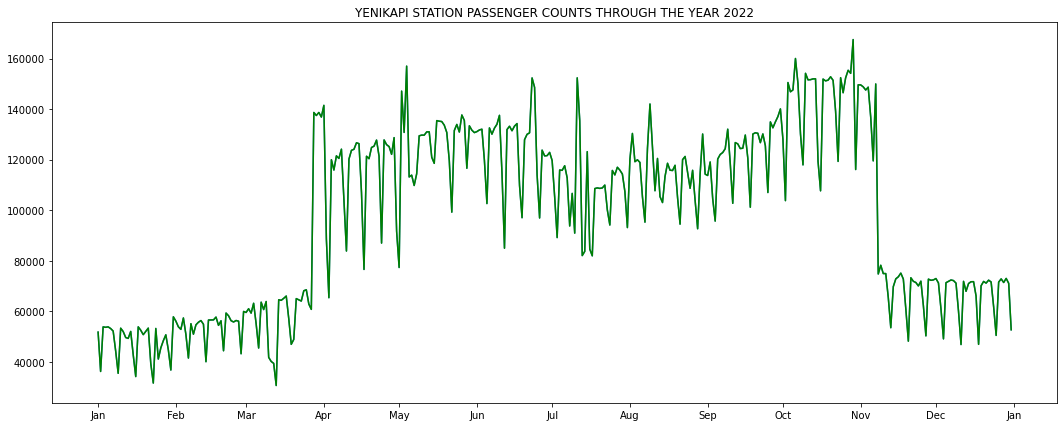

In [60]:
plt.figure(figsize=(18,7))
ax = plt.gca()
plt.plot(df['Date'][df['station_name']=='YENIKAPI'], df['passage_cnt'][df['station_name']=='YENIKAPI'])
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(df['Date'][df['station_name']=='YENIKAPI'], df['passage_cnt'][df['station_name']=='YENIKAPI'], color = 'green')
plt.title('YENIKAPI STATION PASSENGER COUNTS THROUGH THE YEAR 2022');

Now let's take a look at the unleaded gasoline 95 prices in european side of the city.

It looks like an up-trend. In the beginnig of march there is first spike up and at the June we see the highest price. Price starts to fall after July.

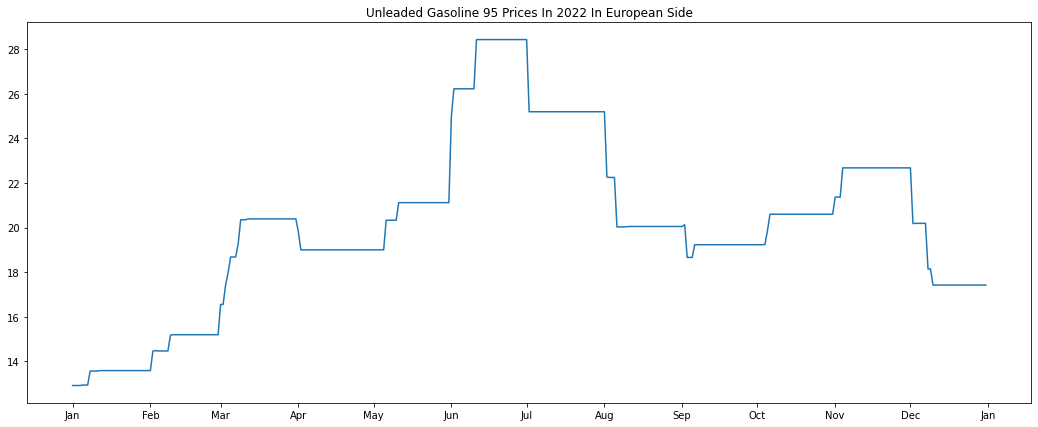

In [61]:
plt.figure(figsize=(18,7))
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(eu_gas.index, eu_gas['Unleaded Gasoline 95'])
plt.title('Unleaded Gasoline 95 Prices In 2022 In European Side');

If we look at the unleaded gasoline 95 prices in asian (anatolian) side, we see nearly no difference.


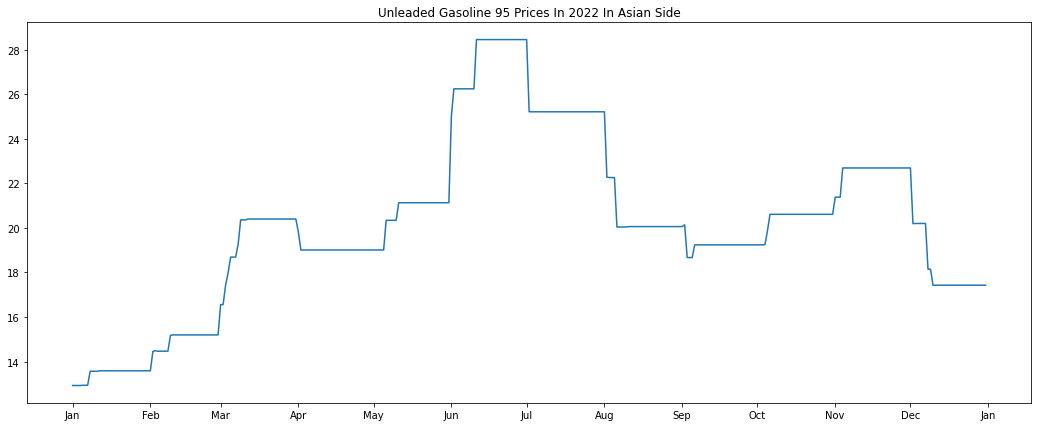

In [62]:

plt.figure(figsize=(18,7))
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(as_gas.index, as_gas['Unleaded Gasoline 95'])
plt.title('Unleaded Gasoline 95 Prices In 2022 In Asian Side');

Let's look closer to the passenger counts in first 90 days of the year 2022.

There are big zig-zags and a similar pattern obviously.

Let's group passenger counts by dates and see the relation with gas prices.

In [63]:
df_totalpsnger = df.groupby(by ='Date').sum('passage_cnt')

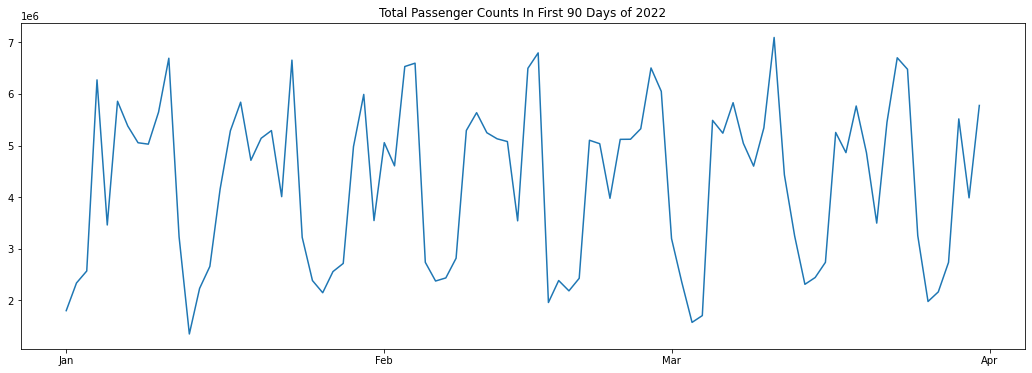

In [64]:
plt.figure(figsize=(18,6))
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(df_totalpsnger.index[0:90], df_totalpsnger['passage_cnt'][0:90])
plt.title('Total Passenger Counts In First 90 Days of 2022');

And let's look at gas prices in same period of time. 
Gas prices has risen sharply at March.

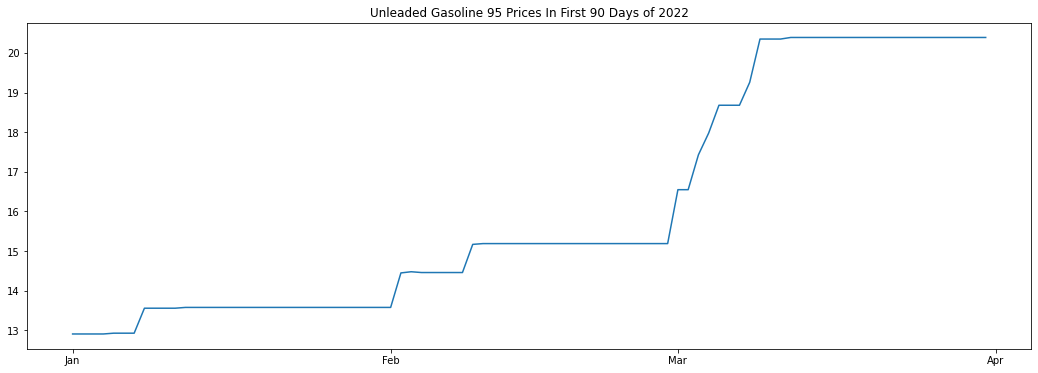

In [65]:
plt.figure(figsize=(18,6))
ax = plt.gca()
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(eu_gas.index[0:90], eu_gas['Unleaded Gasoline 95'][0:90])
plt.title('Unleaded Gasoline 95 Prices In First 90 Days of 2022');

Now as we see the pattern of passenger counts. Let's have a look at passenger counts in daily period. 

In [66]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [67]:
df['day_number'] = df['Date'].apply(lambda x: pd.to_datetime(x).weekday())

In [68]:
df['day_name'] = df['day_number'].map(days)

In [69]:
df.head()

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
0         9551           9027              2022                  1   
1         6791           6418              2022                  1   
2         3943           3775              2022                  1   
3         5133           4972              2022                  1   
4         6213           6011              2022                  1   

   transaction_day                              line station_name  \
0                1  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
1                1  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
2                2  F1-TAKSIM-KABATAS FUNICULAR LINE       TAKSIM   
3                2  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   
4                3  F1-TAKSIM-KABATAS FUNICULAR LINE      KABATAS   

  station_number     town  longitude   latitude        Date  day_number  \
0        KTS-TKS  BEYOGLU  28.992028  41.034056  01-01-2022           5   
1        TAK-KBT  BEYOGLU  28.985750  41.037139  01-01-2022           5   
2        TAK-KBT  BEYOGLU  28.985750  41.037139  02-01-2022           1   
3        KTS-TKS  BEYOGLU  28.992028  41.034056  02-01-2022           1   
4        KTS-TKS  BEYOGLU  28.992028  41.034056  03-01-2022           1   

   day_name  
0  Saturday  
1  Saturday  
2   Tuesday  
3   Tuesday  
4   Tuesday

In [70]:
df_days = df.groupby('day_name').sum('passage_cnt')

In [71]:
df_days= df_days.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Now we can see daily total passenger counts on metro lines.

In [72]:
df_days

passage_cnt  passanger_cnt  transaction_year  transaction_month  \
day_name                                                                     
Monday       235943078      135020090          29848764              96609   
Tuesday      228874559      132370577          29854830              98054   
Wednesday    226900782      130724661          29848764              98601   
Thursday     229794293      132760552          29868984              95283   
Friday       231558721      132539575          29873028              96721   
Saturday     213297241      121892395          30416946              99174   
Sunday       179648085      104444055          29824500              94533   

           transaction_day      longitude       latitude  day_number  
day_name                                                              
Monday              237918  427930.092633  605451.584309           0  
Tuesday             226684  428017.042647  605574.671822       14765  
Wednesday           232448  427929.239996  605451.965672       29524  
Thursday            233875  428222.132055  605861.133618       44316  
Friday              230533  428279.207206  605943.423819       59096  
Saturday            234852  436076.277860  616976.597401       75215  
Sunday              233456  427581.058409  604960.106863       88500

Let's plot the total passengers on daily view.
To show difference better ylim is used.

As we see have biggest number in monday and lowest count in sunday. At the weekend we have lower counts. And that explains zig-zags on the previous plots.

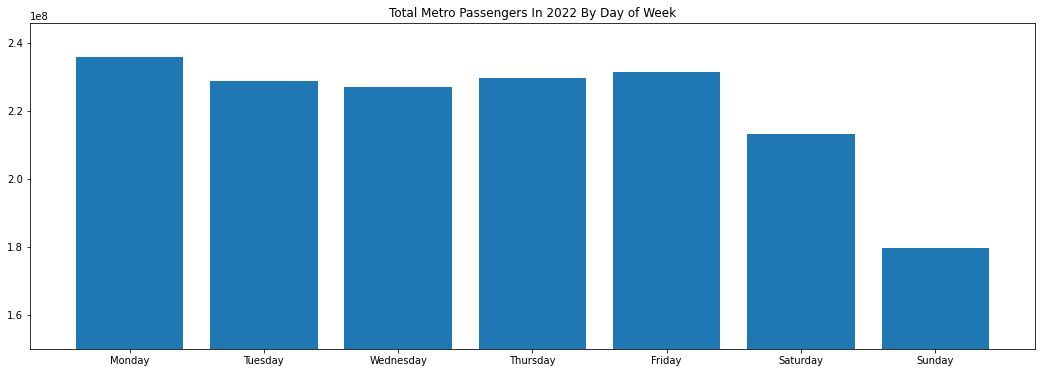

In [73]:
plt.figure(figsize=(18,6))
plt.title('Total Metro Passengers In 2022 By Day of Week')
plt.bar(height= df_days['passage_cnt'], x= df_days.index)
plt.ylim([150000000, 10000000+max(df_days['passage_cnt'])]);

We are going to see which lines has more passengers and if there is a relation between gas prices and metro passenger counts. 

For this purpose we will group the metro lines and show sum of them on monthly period and create a heatmap.

In [74]:
df_lines = df.groupby(['line','transaction_month']).sum('passage_cnt')

In [75]:
df_lines.head(15)

passage_cnt  \
line                             transaction_month                
F1-TAKSIM-KABATAS FUNICULAR LINE 1                       272674   
                                 2                       296034   
                                 3                       449074   
                                 4                       738360   
                                 5                      1029714   
                                 6                       937376   
                                 7                       995368   
                                 8                      1072082   
                                 9                      1069054   
                                 10                     1225378   
                                 11                      588223   
                                 12                      457463   
IETT TUNEL                       1                       252368   
                                 2                       274645   
                                 3                       335698   

                                                    passanger_cnt  \
line                             transaction_month                  
F1-TAKSIM-KABATAS FUNICULAR LINE 1                         264437   
                                 2                         285986   
                                 3                         319278   
                                 4                         302087   
                                 5                         398187   
                                 6                         364603   
                                 7                         353255   
                                 8                         371871   
                                 9                         391181   
                                 10                        466038   
                                 11                        360351   
                                 12                        362922   
IETT TUNEL                       1                         245456   
                                 2                         266820   
                                 3                         260543   

                                                    transaction_year  \
line                             transaction_month                     
F1-TAKSIM-KABATAS FUNICULAR LINE 1                            125364   
                                 2                            113232   
                                 3                            125364   
                                 4                            121320   
                                 5                            125364   
                                 6                            121320   
                                 7                            125364   
                                 8                            125364   
                                 9                            121320   
                                 10                           125364   
                                 11                           121320   
                                 12                           125364   
IETT TUNEL                       1                            125364   
                                 2                            113232   
                                 3                            125364   

                                                    transaction_day  \
line                             transaction_month                    
F1-TAKSIM-KABATAS FUNICULAR LINE 1                              992   
                                 2                              812   
                                 3                              992   
                                 4                              930   
                                 5                              992   
                

We are going to see which lines has more passengers and if there is a relation between gas prices and metro passenger counts. 

In [76]:
multi_index = df_lines.index

In [77]:
total_passengers_by_lines = np.array([df_lines['passage_cnt'][df_lines.index==i].iloc[0] for i in multi_index]).reshape(15,12)

In [78]:
lines = [multi_index[i][0] for i in range(0,180,12)]

In [79]:
months = ['Jannuary','February', 'March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

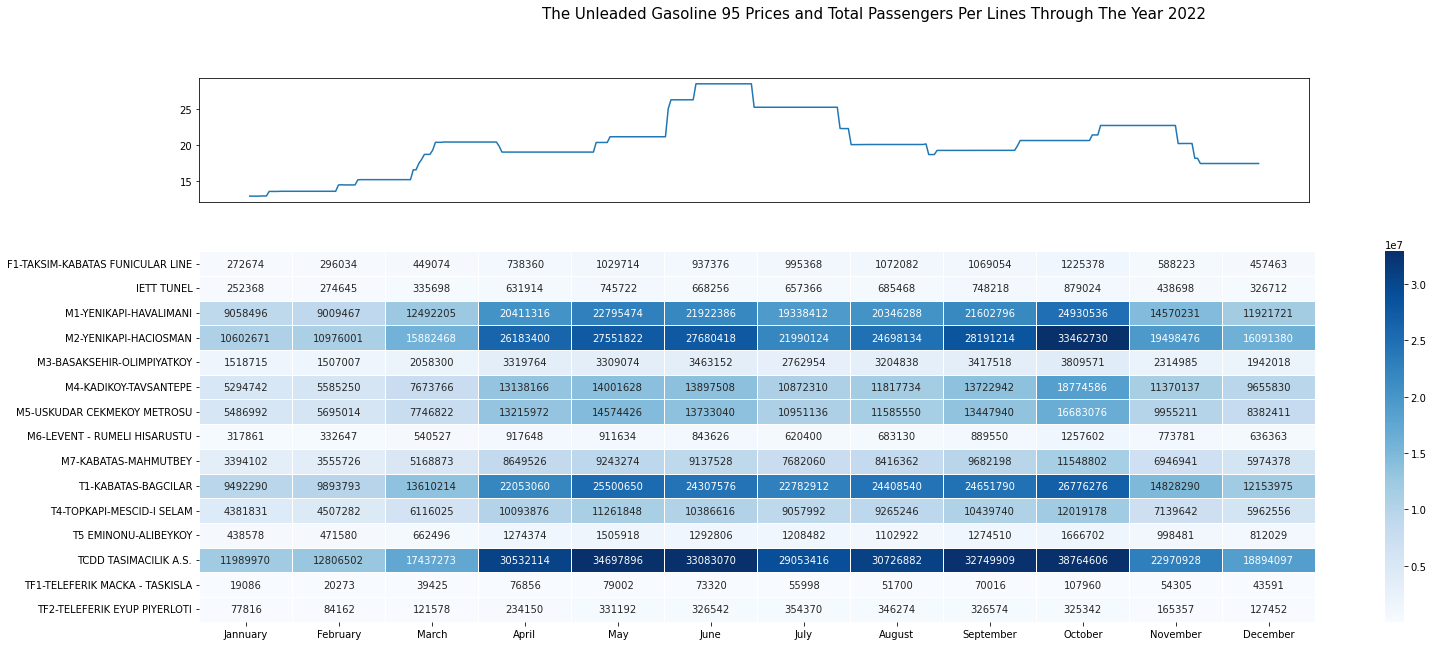

In [80]:
import matplotlib.gridspec
import seaborn as sns
ddf = pd.DataFrame(total_passengers_by_lines, columns = months, index=lines)
gs = matplotlib.gridspec.GridSpec(2,2, width_ratios=[7,1], height_ratios=[1,3])

fig = plt.figure(figsize = (25,10))
ax1 = fig.add_subplot(gs[0,0]) 
ax2 = fig.add_subplot(gs[1,:]) 

fig.suptitle('The Unleaded Gasoline 95 Prices and Total Passengers Per Lines Through The Year 2022',fontsize=15)
ax1.plot(eu_gas.index, eu_gas['Unleaded Gasoline 95'])
ax1.axes.get_xaxis().set_ticks([])
ax2 = sns.heatmap(ddf, linewidth=1, cmap='Blues', annot= True, robust = True, fmt='d')

If we interpret the plot above, we can see there is an uptrend in gas prices and similarly there is an increase on metro lines and we can see July and August has lower numbers than Juny and numbers are increased on September and October. We see drop on gas prices after June. And there is a drop on both prices and passenger counts on November and December. At the first glinch we can see there is a relation on price change and passenger counts. 

In [81]:
df_totalpsnger.corrwith(eu_gas['Unleaded Gasoline 95'])

passage_cnt          0.501825
passanger_cnt        0.124669
transaction_year     0.208357
transaction_month    0.376315
transaction_day      0.041686
longitude            0.206399
latitude             0.208505
dtype: float64

We have 0.501825 correlation between Unleaded Gasoline Prices and Total Passenger Counts on daily.

Now let's have plot the total passenger counts on metro lines.

In [82]:
total_lines = df.groupby(['line']).sum('passage_cnt')

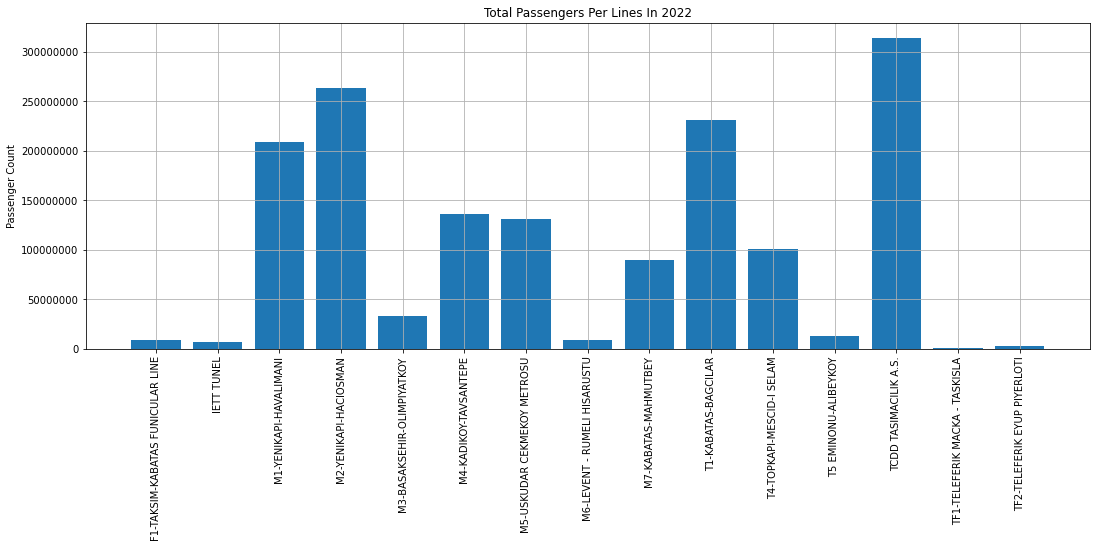

In [83]:
plt.figure(figsize=(18,6))
plt.bar(height= total_lines['passage_cnt'], x= total_lines.index)
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Passengers Per Lines In 2022')
plt.ylabel('Passenger Count')
plt.grid();

So we see TCDD TASIMACILIK A.S. has the biggest count. This line is located at from east to the west of Istanbul and it is the only line which goes under the Bosphorus. If we consider that Istanbul is divided by the bosphorus and connects with 3 bridges for the vehicles and there is a tunnel way under the sea for the vehicles and metro line for the passengers, than we can understand why this line has the biggest count.  And the second biggest number is at M2 YENIKAPI - HACIOSMAN line. This line is located at the highest population ratio in Istanbul and there are several business centers on line's path. 

Let's look which lines has the highest passenger counts

In [84]:
df.groupby(['station_name']).sum('passage_cnt').sort_values('passage_cnt', ascending = False).head(10)

passage_cnt  passanger_cnt  transaction_year  \
station_name                                                     
YENIKAPI             35840579       20898806            738030   
SISLI 2 NORTH        30953437       17970967            738030   
YENIKAPI-2           30853438       18025848            738030   
AKSARAY              25603450       13456405           1476060   
TAKSIM SOUTH         23369291       12629455            738030   
YENIKAPI NORTH       22409590       12768903            738030   
MECIDIYEKOY WEST     19713021       11622037            738030   
YENIKAPI SOUTH       19488262       11284711            738030   
ATAKOY               19379866       11175358           1476060   
USKUDAR-1            19352113       11327253            738030   

                  transaction_month  transaction_day     longitude  \
station_name                                                         
YENIKAPI                       2382             5738  10567.378611   
SISLI 2 NORTH                  2382             5738  10582.130694   
YENIKAPI-2                     2382             5738  10567.338056   
AKSARAY                        4764            11476  21134.148889   
TAKSIM SOUTH                   2382             5738  10579.798750   
YENIKAPI NORTH                 2382             5738  10567.378611   
MECIDIYEKOY WEST               2382             5738  10582.279556   
YENIKAPI SOUTH                 2382             5738  10567.378611   
ATAKOY                         4764            11476  21061.199583   
USKUDAR-1                      2382             5738  10590.475000   

                      latitude  day_number  
station_name                                
YENIKAPI          14966.895972        1097  
SISLI 2 NORTH     14988.319444        1097  
YENIKAPI-2        14966.885833        1097  
AKSARAY           29937.817083        2194  
TAKSIM SOUTH      14978.555694        1097  
YENIKAPI NORTH    14966.895972        1097  
MECIDIYEKOY WEST  14989.284966        1097  
YENIKAPI SOUTH    14966.895972        1097  
ATAKOY            29919.739444        2194  
USKUDAR-1         14974.348056        1097

In this section we are going to re-process the data and map the knowledge we have.
For this purpose we are going to order the line by googling and create a metro map of the Istanbul in 2022

First we gather lines on a line_names list.

In [85]:
line_names = ['T4-TOPKAPI-MESCID-I SELAM', 'T5 EMINONU-ALIBEYKOY', 'IETT TUNEL','TCDD TASIMACILIK A.S.', 'T1-KABATAS-BAGCILAR', 'M6-LEVENT - RUMELI HISARUSTU', 'M3-BASAKSEHIR-OLIMPIYATKOY','M7-KABATAS-MAHMUTBEY',
             'M4-KADIKOY-TAVSANTEPE', 'M5-USKUDAR CEKMEKOY METROSU', 'M2-YENIKAPI-HACIOSMAN','TF1-TELEFERIK MACKA - TASKISLA','TF2-TELEFERIK EYUP PIYERLOTI','F1-TAKSIM-KABATAS FUNICULAR LINE','M1-YENIKAPI-HAVALIMANI' ]

Now we are going to create dictionaries for each lines. But some lines only have two stations, so it is unnecessary to create an order for them. 


In [86]:
station_number_0 = {'TOPKAPI':1,'FETIHKAPI':2, 'VATAN':3, 'EDIRNEKAPI':4,  'SEHITLIK':5, 'DEMIRKAPI':6, 'TOPCULAR':7,
                 'RAMI':8, 'BEREC':9, 'SAGMALCILAR':10, 'CUKURCESME':11, 'ALI FUAT BASGIL':12, 'TASKOPRU':13,
                 'KARADENIZ MAHALLESI':14,'METRIS':15, 'CUMHURIYET':16, 'BASTABYA' :17, 'HACISUKRU':18, 'YENIMAHALLE':19,
                 'SULTANCIFTLIGI':20, 'CEBECI':21, 'MESCIDI SELAM':22 }
station_number_1 = {'CEP OTOGAR':1,'ALIBEYKOY METRO':2, 'ALIBEYKOY':3, 'UNIVERSITE':4,  'SILAHTARAGA':5, 'EYUP DEVLET HASTANESI':6, 'EYUP TELEFERIK':7,
                 'FESHANE':8, 'AYVANSARAY':9, 'BALAT':10, 'FENER':11, 'CIBALI':12}
station_number_3 = {'HALKALI':1,'M.KEMAL':2, 'KUCUKCEKMECE':3, 'FLORYA':4,  'FLORYA AQUA':5, 'YESILKOY':6, 'YESILYURT':7,
                 'ATAKOY':8, 'BAKIRKOY-1':9, 'BAKIRKOY-2':10, 'YENIMAHALLE':11, 'ZEYTINBURNU':12, 'KAZLICESME':13,
                 'YENIKAPI-1':14,'YENIKAPI-2':15, 'YENIKAPI-3':16, 'SIRKECI-1' :17, 'SIRKECI-2':18, 'SIRKECI-3':19,
                 'SIRKECI-4':20, 'USKUDAR-1':21, 'USKUDAR-2':22, 'USKUDAR-2':23,'USKUDAR-3':24, 'AYRILIKCESMESI':25,
                    'SOGUTLUCESME':26,'FENERYOLU':27, 'GOZTEPE':28, 'ERENKOY':29, 'SUADIYE':30, 'BOSTANCI-1':31, 'BOSTANCI-2':32,
                    'KUCUKYALI-1':33,'KUCUKYALI-2':34, 'IDEALTEPE':35, 'SUREYYA PLAJI':36, 'MALTEPE':37, 'CEVIZLI-1':38,
                    'CEVIZLI-2':39, 'ATALAR':40, 'BASAK':41, 'KARTAL':42, 'YUNUS':43, 'PENDIK':44, 'KAYNARCA':45, 'TERSANE-1':46,
                  'TERSANE-2':47,  'GUZELYALI':48, 'AYDINTEPE':49, 'ICMELER':50, 'TUZLA':51, 'CAYIROVA':52, 'GEBZE TEKNIK UNI':53,
                    'OSMANGAZI':54,'DARICA':55, 'GEBZE-1':56, 'GEBZE-2':57 }
station_number_4 = {'KABATAS':1,'KABATAS 2':2, 'FINDIKLI':3, 'TOPHANE':4,  'KARAKOY':5, 'EMINONU 2':6, 'SIRKECI':7,
                 'GULHANE':8, 'SULTANAHMET':9, 'CEMBERLITAS':10, 'BEYAZIT':11, 'LALELI':12, 'AKSARAY':13,
                 'YUSUFPASA':14,'HASEKI':15, 'FINDIKZADE':16, 'CAPA' :17, 'PAZARTEKKE':18, 'TOPKAPI':19,
                 'ATATURK OGRENCI YURDU':20, 'MERKEZEFENDI':21, 'AKSEMSETTIN':22, 'MITHATPASA':23,'ZEYTINBURNU 2':24, 'MEHMETAKIF':25,
                    'KERESTECILER':26,'GUNGOREN':27, 'AKINCILAR':28, 'SOGANLI':29, 'CAMI':30, 'GUNESTEPE':31, 'BAGCILAR':32 }
station_number_5 = {'LEVENT WEST KONKORS':1,'LEVENT EAST KONKORS':2, 'NISPETIYE':3, 'ETILER':4,  'BOGAZICI':5}
station_number_6 = {'KIRAZLI':1,'YENI MAHALLE':2, 'MAHMUTBEY':3, 'MAHMUTBEY M3 HOL 3':4,  'MAHMUTBEY M3 HOL 4':5,  
                    'ISTOC':6, 'IKITELLI SANAYI':7, 'TURGUT OZAL':8, 'SITELER':9, 'BASAK KONUTLARI':10,
                   'METROKENT':13, 'ONURKENT':14, 'SEHIR HASTANESI':15 }
station_number_7 = {'MAHMUTBEY M7 HOL 1':1,  'MAHMUTBEY M7 HOL 3':2, 'MAHMUTBEY M7 HOL 4':3,'MAHMUTBEY M7 HOL 2':4,'GOZTEPE WEST':5,
                    'GOZTEPE EAST':6, 'ORUCREIS WEST':7,  'ORUCREIS EAST':8, 'TEKSTILKENT':9,'KARADENIZ MAH. WEST':10, 'KARADENIZ MAH. EAST':11, 
                    'YENIMAHALLE':12, 'KAZIMKARABEKIR':13, 'YESILPINAR':14, 'VEYSELKARANI EAST':15,'VEYSELKARANI WEST':16, 'CIRCIR WEST':17,
                    'CIRCIR EAST':18, 'ALIBEYKOY WEST': 19, 'ALIBEYKOY EAST': 20, 'NURTEPE WEST': 21, 'NURTEPE EAST': 22, 'KAGITHANE WEST': 23,
                    'KAGITHANE EAST': 24, 'CAGLAYAN WEST': 25, 'CAGLAYAN EAST':26, 'MECIDIYEKOY WEST': 27, 'MECIDIYEKOY EAST':28,
                   'M7 FULYA': 29,'M7 YILDIZ 1':30,'M7 YILDIZ 2':31 }
station_number_8 = {'KADIKOY (WEST)':1,  'KADIKOY (EAST)':2, 'AYRILIKCESME':3,'ACIBADEM (WEST)':4,'ACIBADEM (EAST)':5,
                    'UNALAN':6, 'GOZTEPE':7, 'YENISAHRA':8,  'KOZYATAGI':9, 'BOSTANCI':10, 'BOSTANCI (WEST)':11,'BOSTANCI (EAST)':12, 'KUCUKYALI':13, 
                    'MALTEPE':14, 'HUZUREVI':15, 'GULSUYU':16, 'ESENKENT CEVIZLI':17,'HASTANE (WEST)':18, 'HASTANE (EAST/ADLIYE)':19,
                    'SOGANLIK':20, 'KARTAL (WEST)': 21, 'KARTAL (EAST)':22, 'YAKACIK (WEST)': 23, 'YAKACIK (EAST)': 24, 'PENDIK (WEST)': 25, 'PENDIK (EAST)': 26,
                    'TAVSANTEPE (WEST)': 27, 'TAVSANTEPE (EAST)': 28, 'FEVZI CAKMAK':29, 'YAYALAR': 30, 'M4 KURTKOY':31,
                   'SABIHA GOKCEN': 32}
station_number_9 = {'USKUDAR 2':1,  'USKUDAR 1':2, 'FISTIKAGACI':3,'BAGLARBASI':4,'ALTUNIZADE 1':5,
                    'ALTUNIZADE 2':6, 'KISIKLI':7, 'BULGURLU':8,  'UMRANIYE':9, 'CARSI':10, 'YAMANEVLER':11,'CAKMAK':12, 'IHLAMUR KUYU':13, 
                    'ALTINSEHIR':14, 'IMAM HATIP LISESI':15, 'DUDULLU':16, 'NECIP FAZIL':17,'CEKMEKOY 1':18, 'CEKMEKOY 2':19}
station_number_10 = {'YENIKAPI SOUTH':1,  'YENIKAPI NORTH':2, 'VEZNECILER SOUTH':3,'VEZNECILER NORTH':4,'HALIC SOUTH':5,
                    'HALIC NORTH':6, 'SISHANE SOUTH':7, 'SISHANE NORTH':8,  'TAKSIM SOUTH':9, 'OSMANBEY 2 SOUTH':10, 'OSMANBEY NORTH':11,'SISLI SOUTH':12,
                    'SISLI 2 NORTH':13, 'GAYRETTEPE':14, 'LEVENT SOUTH':15, 'LEVENT 2 NORTH':16, '4 LEVENT 2 SOUTH':17,'4 LEVENT NORTH':18, 'SANAYI MAH. SOUTH':19,
                    'SANAYI MAH. NORTH':20, 'ITU SOUTH':21, 'ITU NORTH':22,'ATATURK OTO SANAYI SOUTH':23, 'ATATURK OTO SANAYI NORTH':24,
                    'DARUSSAFAKA':25, 'HACIOSMAN':26}
station_number_10b = {'SEYRANTEPE 1 WEST':1,  'SEYRANTEPE 2 EAST':2, 'SEYRANTEPE 3 STAD GIRISI':3,'SANAYI MAH. SOUTH':4}
station_number_14a = {'HAVAALANI':1,  'IDTM':2, 'YENIBOSNA':3,'ATAKOY':4,'BAHCELIEVLER':5,
                    'BAKIRKOY':6, 'ZEYTINBURNU':7, 'MERTER':8,  'DAVUTPASA':9, 'TERAZIDERE':10, 'OTOGAR':11,'OTOGAR 1':12, 'KARTALTEPE':13, 
                    'SAGMALCILAR':14, 'BAYRAMPASA':15, 'ULUBATLI':16, 'EMNIYET':17,'ESENLER':18, 'AKSARAY 1':19, 'AKSARAY':20, 'YENIKAPI':20}
station_number_14b = {'KIRAZLI':1,  'BAGCILAR MEYDAN':2, 'UCYUZLU':3,'MENDERES':4,'ESENLER':5,'OTOGAR 1':6}


On this step let's grab the lat and long info from the stations.


In [87]:
line0 = df[df['line']==line_names[0]].groupby('station_name').mean()[['latitude','longitude']]
line1 = df[df['line']==line_names[1]].groupby('station_name').mean()[['latitude','longitude']]
line2 = df[df['line']==line_names[2]].groupby('station_name').mean()[['latitude','longitude']]
line3 = df[df['line']==line_names[3]].groupby('station_name').mean()[['latitude','longitude']]
line4 = df[df['line']==line_names[4]].groupby('station_name').mean()[['latitude','longitude']]
line5 = df[df['line']==line_names[5]].groupby('station_name').mean()[['latitude','longitude']]
line6 = df[df['line']==line_names[6]].groupby('station_name').mean()[['latitude','longitude']]
line7 = df[df['line']==line_names[7]].groupby('station_name').mean()[['latitude','longitude']]
line8 = df[df['line']==line_names[8]].groupby('station_name').mean()[['latitude','longitude']]
line9 = df[df['line']==line_names[9]].groupby('station_name').mean()[['latitude','longitude']]
line10 = df[df['line']==line_names[10]].groupby('station_name').mean()[['latitude','longitude']]
line10b = line10.iloc[[16,17,18,19],]
line10 = line10.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28],]
line11 = df[df['line']==line_names[11]].groupby('station_name').mean()[['latitude','longitude']]
line12 = df[df['line']==line_names[12]].groupby('station_name').mean()[['latitude','longitude']]
line13 = df[df['line']==line_names[13]].groupby('station_name').mean()[['latitude','longitude']]
line14 = df[df['line']==line_names[14]].groupby('station_name').mean()[['latitude','longitude']]
line14a = line14.iloc[[0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 18, 19, 21, 22, 23, 24],]
line14b = line14.iloc[[13, 3, 20, 14, 9,17],]

Now we are going to map the lines based on the dictionaries we have created

In [88]:
line0['station_number'] = line0.index.map(station_number_0)
line1['station_number'] = line1.index.map(station_number_1)
line3['station_number'] = line3.index.map(station_number_3)
line4['station_number'] = line4.index.map(station_number_4)
line5['station_number'] = line5.index.map(station_number_5)
line6['station_number'] = line6.index.map(station_number_6)
line7['station_number'] = line7.index.map(station_number_7)
line8['station_number'] = line8.index.map(station_number_8)
line9['station_number'] = line9.index.map(station_number_9)
line10['station_number'] = line10.index.map(station_number_10)
line10b['station_number'] = line10b.index.map(station_number_10b)
line14a['station_number'] = line14a.index.map(station_number_14a)
line14b['station_number'] = line14b.index.map(station_number_14b)

And we can reorder the lines based on the station number we have defined.


In [89]:
line0.sort_values('station_number', inplace = True)
line1.sort_values('station_number', inplace = True)
line3.sort_values('station_number', inplace = True)
line4.sort_values('station_number', inplace = True)
line5.sort_values('station_number', inplace = True)
line6.sort_values('station_number', inplace = True)
line7.sort_values('station_number', inplace = True)
line8.sort_values('station_number', inplace = True)
line9.sort_values('station_number', inplace = True)
line10.sort_values('station_number', inplace = True)
line10b.sort_values('station_number', inplace = True)
line14a.sort_values('station_number', inplace = True)
line14b.sort_values('station_number', inplace = True)

We will save the coordinates as a tupple in a list.


In [90]:
line0_coord = [(line0['latitude'].iloc[i],line0['longitude'].iloc[i]) for i in range(len(line0))]
line1_coord = [(line1['latitude'].iloc[i],line1['longitude'].iloc[i]) for i in range(len(line1))]
line2_coord = [(line2['latitude'].iloc[i],line2['longitude'].iloc[i]) for i in range(len(line2))]
line3_coord = [(line3['latitude'].iloc[i],line3['longitude'].iloc[i]) for i in range(len(line3))]
line4_coord = [(line4['latitude'].iloc[i],line4['longitude'].iloc[i]) for i in range(len(line4))]
line5_coord = [(line5['latitude'].iloc[i],line5['longitude'].iloc[i]) for i in range(len(line5))]
line6_coord = [(line6['latitude'].iloc[i],line6['longitude'].iloc[i]) for i in range(len(line6))]
line7_coord = [(line7['latitude'].iloc[i],line7['longitude'].iloc[i]) for i in range(len(line7))]
line8_coord = [(line8['latitude'].iloc[i],line8['longitude'].iloc[i]) for i in range(len(line8))]
line9_coord = [(line9['latitude'].iloc[i],line9['longitude'].iloc[i]) for i in range(len(line9))]
line10_coord = [(line10['latitude'].iloc[i],line10['longitude'].iloc[i]) for i in range(len(line10))]
line10b_coord = [(line10b['latitude'].iloc[i],line10b['longitude'].iloc[i]) for i in range(len(line10b))]
line11_coord = [(line11['latitude'].iloc[i],line11['longitude'].iloc[i]) for i in range(len(line11))]
line13_coord = [(line13['latitude'].iloc[i],line13['longitude'].iloc[i]) for i in range(len(line13))]
line14a_coord = [(line14a['latitude'].iloc[i],line14a['longitude'].iloc[i]) for i in range(len(line14a))]
line14b_coord = [(line14b['latitude'].iloc[i],line14b['longitude'].iloc[i]) for i in range(len(line14b))]

For mapping we will use folium library.

In [91]:
import folium

Let's save the coordinates in a list. 


In [92]:
coords = [line0_coord, line1_coord, line2_coord, line3_coord, line4_coord, line5_coord, line6_coord, line7_coord, line8_coord, line9_coord, line10_coord, line10b_coord, line11_coord,  line13_coord, line14a_coord, line14b_coord]

In [93]:
colors = ['#0000FF','#000000','#FF007F','#FF0000','#009900','#FF00FF','#0080FF','#CC00CC','#0080FF','#FF00FF','#FF0000','#FF0000','#0000FF','#99004C','#7F00FF','#7F00FF']

In [94]:
m = folium.Map(location=[41.024072754701365, 29.001684544849244], zoom_start=11, control_scale=True)
for i in range(len(coords)):
    folium.PolyLine(coords[i], color=colors[i], weight=2.5, opacity=1).add_to(m)
m

Ta-da! We have a metro map of Istanbul on 2022.

Now we are going to go further and visualize daily change on all over the stations during the year.

We will normalize the passenger counts and create a heatmap with it on the map and we will observe the change of heatmap over the dates of 2022.

Let's define our normalizing function first. 


In [95]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    max_arr = max(arr)
    min_arr = min(arr)
    diff = t_max - t_min
    diff_arr = max_arr - min_arr
    for i in arr:
        temp = (((i - min_arr)*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

For safety!

In [96]:
df_norm = df.copy()

And create a new column with our function.


In [97]:
df_norm['normalized_passage_cnt'] = normalize(arr = np.array(df['passage_cnt']), t_min = 0, t_max = 15)

We need to sort the values by dates.


In [98]:
df_date = df_norm[['latitude','longitude','Date', 'normalized_passage_cnt']].sort_values('Date')

We are going to create an arry which has the numbers of day counts. In some days some lines or stations are closed or not used by different reason. 
That's why we don't have same number of rows in for ex. 01-01-2022 and 05-08-2022
So first we need to find how many rows there exist in each day and store them in a variable called date_counts.

In [99]:
df_date.index = df_date['Date']
date_counts = np.array(df_date.groupby(df_date.index).count()['latitude'])

No we need to convert to the array of df_date columns and reshape the array as in each day there is an array and inside of it there are arrays for each stations.
This is the hardest work for the computer so it can take some time.

In [100]:
row = 0
fin_arr = []
for i in range(len(date_counts)):
    new_arr = []
    for j in range(date_counts[i]):
        new_arr.append(list(df_date[['latitude', 'longitude', 'normalized_passage_cnt']].iloc[row]))
        row = row + 1 
    fin_arr.append(list(new_arr))        

And now we are going to create a date-range for our data.

In [101]:
time_index = pd.date_range(start = '01.01.2022', periods=365)

In [102]:
time_index = [i.date().strftime('%d-%m-%Y') for i in time_index]

We can create our animation now. folium has a great feature for this named HeatMapWithTime. We will start mapping the lines and then we will add heatmap on it. 

When we click the Play button dates will start to change and our heatmap will be reshaped by the knowledge for the each day. Speed is set to 1.3 fps but it is adjustable by the viewer.

We can drag the date and see the day we wonder, or we can zoom in and out to see larger or closer scale.

In [103]:
import folium.plugins as plugins

In [104]:
m = folium.Map(location=[41.024072754701365, 29.001684544849244], zoom_start=10, control_scale=True)
for i in range(len(coords)):
    folium.PolyLine(coords[i], color=colors[i], weight=2.5, opacity=1).add_to(m)

hm = plugins.HeatMapWithTime(fin_arr, index=time_index,   auto_play=True, max_opacity=0.8,speed_step =0.6)

hm.add_to(m)
m

## CONCLUSION

In this work we tried to process the passenger data and gas prices. We can have conclusion that there is a relation between gas prices and passenger counts in metro lines. But we need to have a further information to create a model that predicts the passenger counts. 

So, gas prices can't determine the passenger counts by itself. For a detailed investigation we need to have the information of how the employee salaries change during the 2022, we need to know if or when metro line train counts are increased or decreased, also we can add to our work that when schools are open and which days are national or religional day-offs and how the weather was. After all some road constructions can effect the daily passenger counts on metro lines.